In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# Imports e funções 
MAIN_FOLDER_PATH = "D:\\98_phD_Files\\Simulator-RSA-SAR-RL-GA\\src-java\\data\\"

def getResultsDataFrame(dataDict: dict) -> pd.DataFrame:
    PATH: str = f"{MAIN_FOLDER_PATH}{dataDict['Folder']}\\results.txt"

    return pd.read_csv(PATH, sep=';')

def getMeanSameNetworkLoad(dataFrame: pd.DataFrame) -> pd.DataFrame:

    columns = ['networkLoad','probabilityBlocking', 'executionTime', 'MSCLCycle']

    dataFrameClean = dataFrame[columns]

    return dataFrameClean.groupby('networkLoad').mean()

def plotResults(datas: list, type: str, axis) -> None:

    if type == "executionTime":
        for result in datas:
            df_mean = getMeanSameNetworkLoad(getResultsDataFrame(result))

            # Converte o tempo de execução de milissegundos para segundos
            axis.plot(df_mean.index, df_mean[type] / 1000, color=result['Color'], linestyle=result['Line'], marker=result['Mark'], label=result['Label'])
    else:
        for result in datas:
            df_mean = getMeanSameNetworkLoad(getResultsDataFrame(result))

            axis.plot(df_mean.index, df_mean[type], color=result['Color'], linestyle=result['Line'], marker=result['Mark'], label=result['Label'])

    if type == "probabilityBlocking":

        axis.set_yscale('log')
        axis.set_ylabel("Probabilidade de Bloqueio")
        axis.set_xlabel("Carga da Rede (Erlangs)")
        #axis.set_title("Probabilidade de Bloqueio x Carga da Rede")
        axis.grid(axis='both', which='both')

        plt.ylim(1e-5, 1e-1)

        # Uma única legenda para todos os gráficos centralizada na parte superior da figura
        axis.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=False, ncol=3, fontsize=12)
        
    elif type == "executionTime":
        
        axis.set_ylabel("Tempo de Execução (s)")
        axis.set_xlabel("Carga da Rede (Erlangs)")
        #axis.set_title("Tempo de Execução x Carga da Rede")
        axis.grid(axis='both', which='both')

MARKER: dict = {
    "k=1": "o",
    "k=2": "s",
    "k=3": "d",
    "k=4": "p",
    "k=5": "h",
}

LINES: dict = {
    "RSA" : ":",
    "MSCLS" : "-.",
    "MSCLC" : "--",
    "SAR" : "-",
}

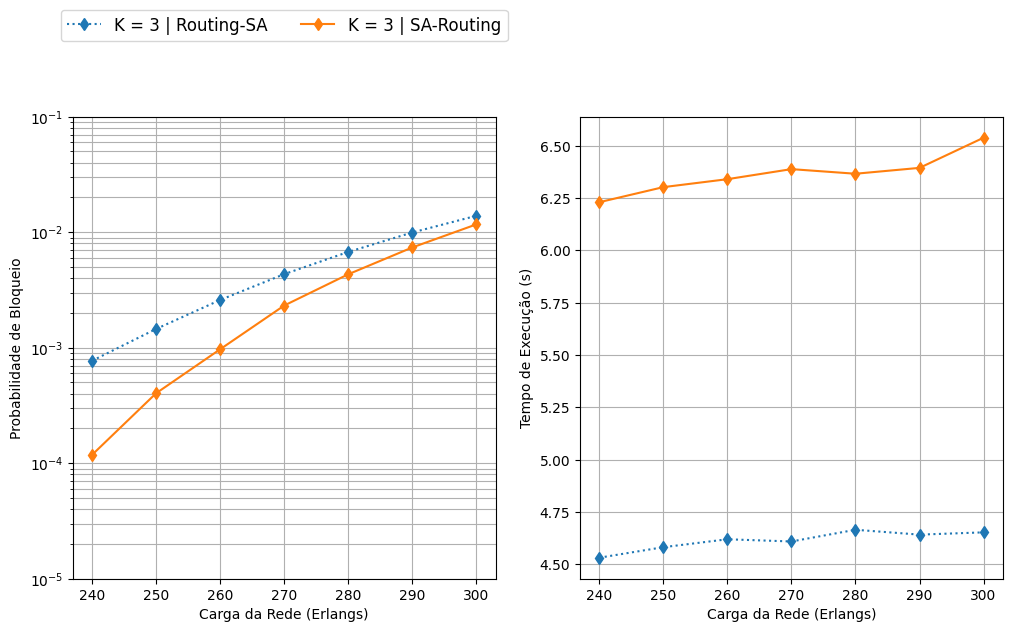

In [11]:
DATA_NSFNet: list = [
    {
        "Folder": "2024-02-29_14-05-55_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 3 | Routing-SA",
        "Label": "K = 3 | Routing-SA", "Color": None, "Mark": MARKER['k=3'], "Line": LINES['RSA'],
    },
    {
        "Folder": "2024-02-29_14-03-41_NSFNet_YEN_FirstFit_SA_Routing_ITwoCollectData_DONE",
        "Obs": "K = 3 | SA-Routing",
        "Label": "K = 3 | SA-Routing", "Color": None, "Mark": MARKER['k=3'], "Line": LINES['SAR'],
    },
]

# Gráfico de probabilidade de Bloqueio para NSFNet

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sem ordenar
plt.subplot(1,2,1) # Linhas, colunas, número do plot

plotResults(DATA_NSFNet, 'probabilityBlocking', axis=ax[0])

plotResults(DATA_NSFNet, 'executionTime', axis=ax[1])

plt.show()
